#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import os
import wandb

wandb_api_key = os.getenv("WANDB_API_KEY")  # Get key from system environment
wandb.login(key=wandb_api_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: dipti-dhawade (dipti-dhawade-plaksha-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
wandb.init(project='distance_classification_project')

Image saved as output.jpg with 30 faces detected.


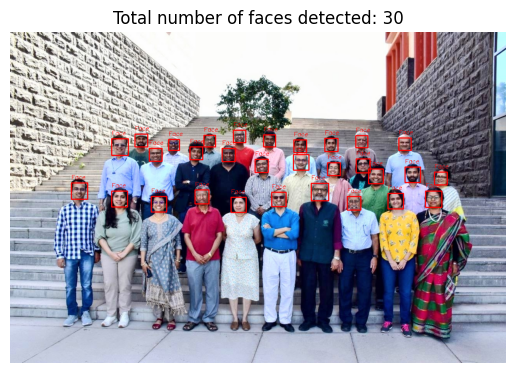

In [4]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255) ## Text color in BGR format (here, it's red)
font_thickness = 1 ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imwrite("output.jpg", img)
print(f"Image saved as output.jpg with {len(faces_rect)} faces detected.")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")  # Hide axis
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.show()

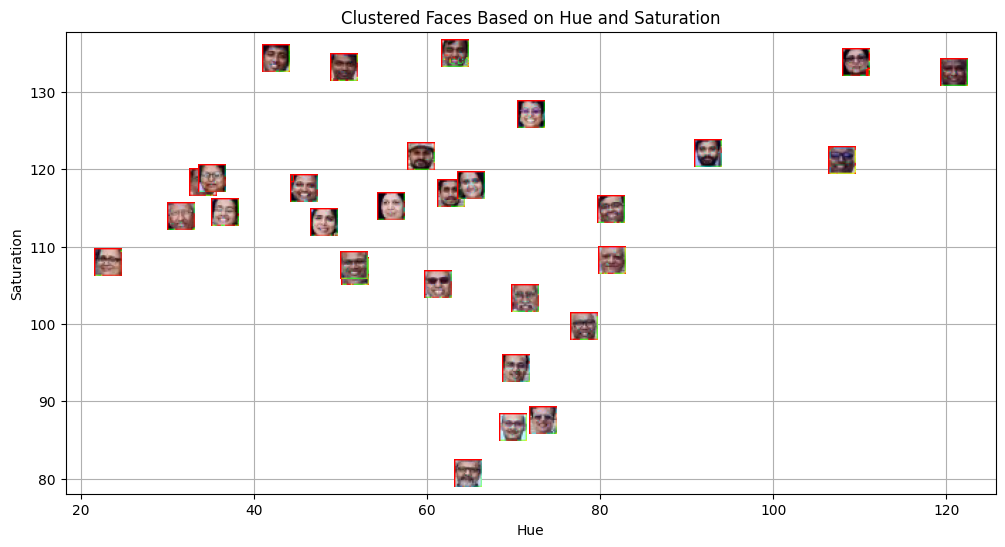

In [5]:
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces Based on Hue and Saturation")
plt.grid()
plt.savefig("clustered_faces.png", dpi=300, bbox_inches='tight')
plt.show()

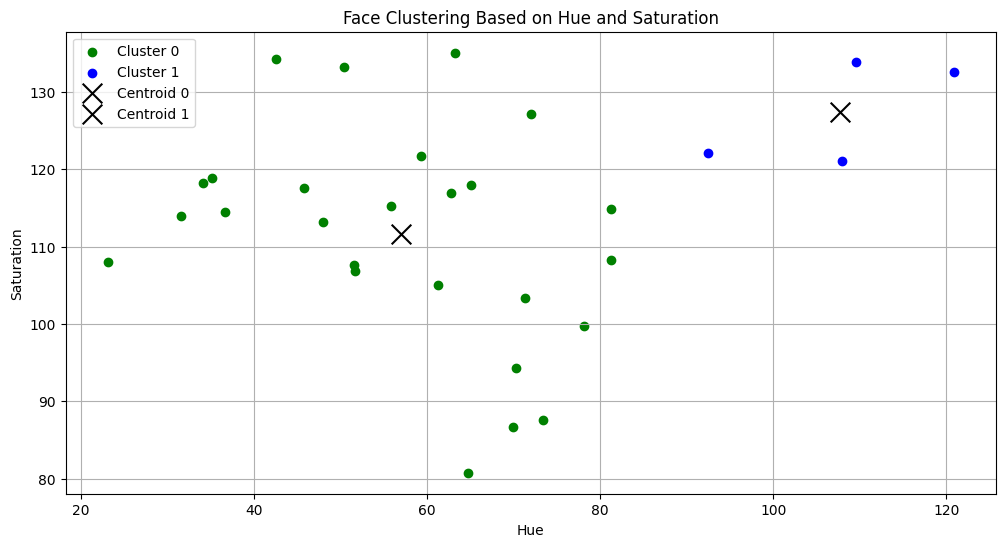

In [6]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=200, color='black', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=200, color='black', label='Centroid 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering Based on Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid()
plt.savefig("face_clustering.png", dpi=300, bbox_inches='tight')
## Show the plot
plt.show()

Template image saved as template_output.jpg with 0 faces detected.


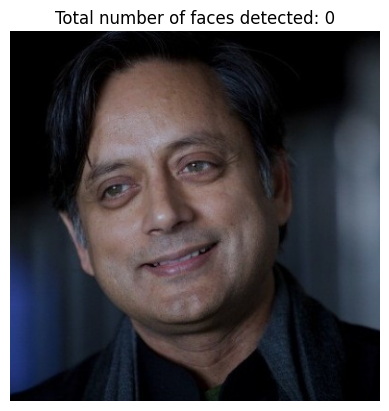

In [7]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
template_faces = face_cascade.detectMultiScale(gray_template, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Save the processed template image
cv2.imwrite("template_output.jpg", template_img)
print(f"Template image saved as template_output.jpg with {len(template_faces)} faces detected.")

template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(template_img_rgb)
plt.axis("off")  # Hide axis
plt.title(f"Total number of faces detected: {len(template_faces)}")
plt.show()   

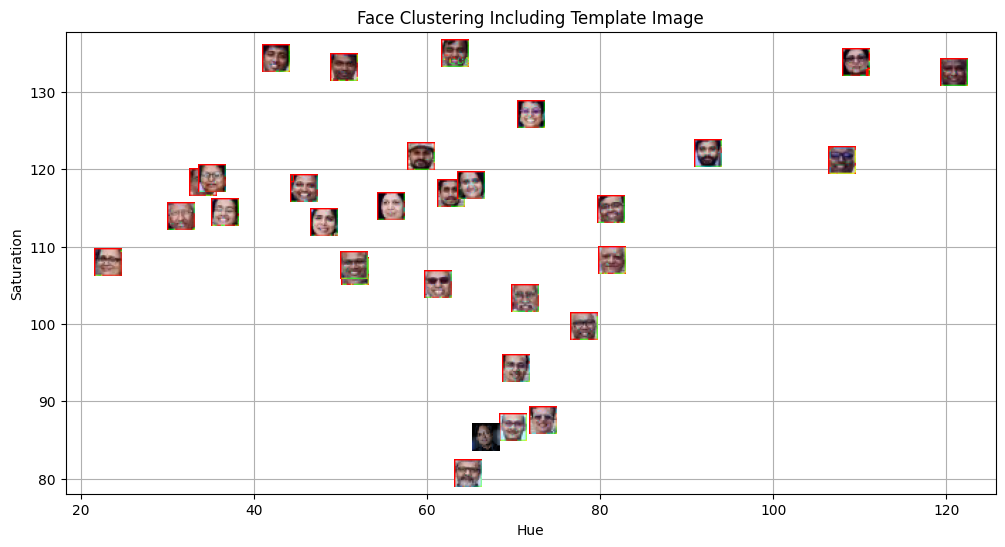

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)


# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering Including Template Image")
plt.grid()
plt.savefig("clusteredFace_with_templateImage.png", dpi=300, bbox_inches='tight')
plt.show()

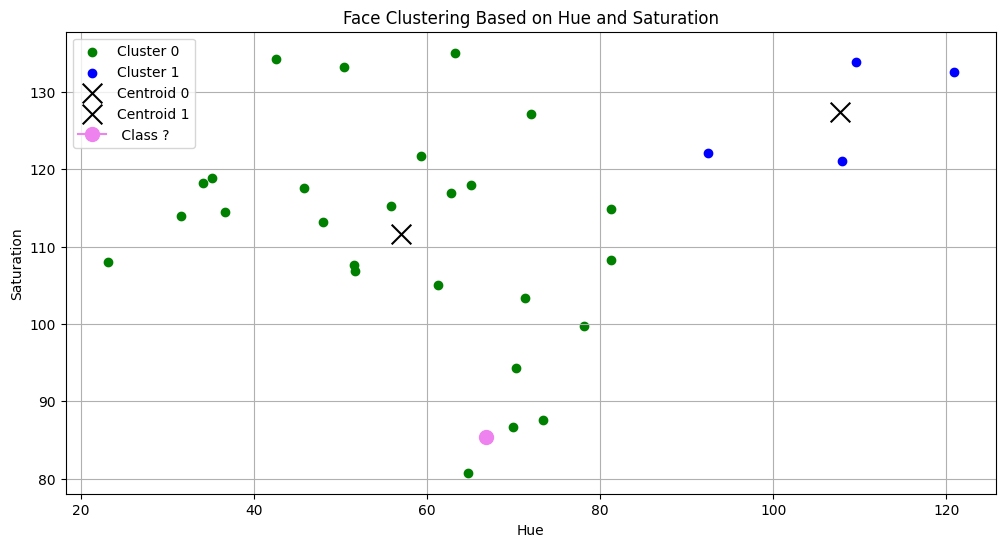

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=200, color='black', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=200, color='black', label='Centroid 1')

plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering Based on Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid()
plt.savefig("faceClustering_with_templateImage.png", dpi=300, bbox_inches='tight')
## Show the plot
plt.show()

In [18]:
wandb.log({"Output Image": wandb.Image("output.jpg")})
wandb.log({"Template Output Image": wandb.Image("template_output.jpg")})
wandb.log({"Clustered Faces": wandb.Image("clustered_faces.png")})
wandb.log({"Face Clustering": wandb.Image("face_clustering.png")})
wandb.log({"Clustered Faces with Template Image": wandb.Image("clusteredFace_with_templateImage.png")})
wandb.log({"Face CLustering with Template Image": wandb.Image("faceClustering_with_templateImage.png")})

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
- Euclidean Distance
- Manhattan Distance
- Mahalanobis Distance
- Minkowski Distance
- Chebyshev Distance
- Hamming Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
- Spam Detection
- OCR Applications: Handwritten Digits
- Recommendation Systems
- Pose Correction: Based on angle of joints

#### 3. Explain various distance metrics. 
- Euclidean Distance: Best for continuous data and when all features have similar variance.
- Manhattan Distance: This is used with grid-based data or when differences should be measured in a stepwise way.
- Mahalanobis Distance: Ideal for correlated features where scaling and normalization are required.
- Minkowski Distance: A flexible metric that generalizes various distance metrics.
- Chebyshev Distance: Useful when the maximum difference in any feature is crucial.
- Hamming Distance: Primarily used for categorical data such as text and binary sequences. Check the error in the data. Application: Data Transfer

#### 4. What is the role of cross validation in model performance? 
- Ensures the model does not memorize training data but well generalizes the unseen data.
- Provides an unbiased estimate of the model’s accuracy.
- Common Technique:
    - ***K-Fold Cross-Validation:*** Splits data into k subsets and trains k times
    each time using a different fold as validation.
#### 5. Explain variance and bias in terms of KNN? 
- Bias: Measures how much the model’s predictions deviate from the true values.
    - A high value of k (eg. k=20) results in a high bias because the model smooths out decision boundaries too much.
- Variance: Measures how much the model's predictions fluctuate for different training sets.
   - A low k (eg. k=1) leads to high variance because the model is highly sensitive to individual training points.